In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from pyclustering.utils.metric import distance_metric, type_metric

from yellowbrick.cluster import KElbowVisualizer

import utils
from common import *
from projection import *
from estimators import *
from experiment2 import *
from embedding import *
from scoring import *
import heartdisease

plt.rcParams.update({'font.size': 16})

from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [2]:
df_X, df_y = heartdisease.load_dataset()
df = pd.concat([df_X, df_y], axis=1)
print(df.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak    IsMale  \
0 -1.433140   0.328423     0.567911  -0.551341  1.382928 -0.855375  0.515952   
1 -0.478484   0.964113     0.348389  -0.551341  0.754157  0.224868 -1.938163   
2 -1.751359  -0.024121     0.558175  -0.551341 -1.525138 -0.855375  0.515952   
3 -0.584556   0.259958     0.428555  -0.551341 -1.132156  0.679595 -1.938163   
4  0.051881   0.656800     0.385467  -0.551341 -0.581981 -0.855375  0.515952   

   HasExerciseAngina  ChestPainType_TA  ChestPainType_ATA  ChestPainType_NAP  \
0          -0.823556         -0.229679           2.075177          -0.532838   
1          -0.823556         -0.229679          -0.481887           1.876744   
2          -0.823556         -0.229679           2.075177          -0.532838   
3           1.214246         -0.229679          -0.481887          -0.532838   
4          -0.823556         -0.229679          -0.481887           1.876744   

   RestingECG_ST  RestingECG_LVH  IsST

In [3]:
# categorical_cols = [
#     'FastingBS',
#     'IsMale', 
#     'HasExerciseAngina', 
#     'ChestPainType_TA', 
#     'ChestPainType_ATA', 
#     'ChestPainType_NAP',
#     'RestingECG_ST',
#     'RestingECG_LVH',
#     'IsSTSlope_Up',
#     'IsSTSlope_Down'
# ]
# encoder = CategoricalEmbeddingEncoder(categorical_cols)
# encoder.fit(df_X)
# encoder.predict(df_X).head()

In [4]:
experiment = Experiment(df_X, df_y)

# Set NN Parameters for Step 4
experiment.state[3]['pca'] = {}
experiment.state[3]['ica'] = {}
experiment.state[3]['grp'] = {}
experiment.state[3]['svc'] = {}
experiment.state[3]['pca']['mlp'] = MLPClassifier(activation='logistic', hidden_layer_sizes=(6), alpha=1.0, max_iter=200, random_state=experiment.rng)
experiment.state[3]['ica']['mlp'] = MLPClassifier(activation='logistic', hidden_layer_sizes=(6), alpha=1.0, max_iter=200, random_state=experiment.rng)
experiment.state[3]['grp']['mlp'] = MLPClassifier(activation='relu', hidden_layer_sizes=(12, 12, 12), alpha=1.0, max_iter=200, random_state=experiment.rng)
experiment.state[3]['svc']['mlp'] = MLPClassifier(activation='logistic', hidden_layer_sizes=(6, 6), alpha=1.0, max_iter=200, random_state=experiment.rng)

# Set NN Parameters for Step 5
experiment.state[4]['kmeans'] = {}
experiment.state[4]['em'] = {}
experiment.state[4]['kmeans']['mlp'] = MLPClassifier(activation='tanh', hidden_layer_sizes=(12, 12, 12), alpha=1.0, max_iter=200, random_state=experiment.rng)
experiment.state[4]['em']['mlp'] = MLPClassifier(activation='tanh', hidden_layer_sizes=(12, 12, 12), alpha=1.0, max_iter=200, random_state=experiment.rng)

# Choose ICA Features
experiment.state[1]['ica'] = {}
experiment.state[1]['ica']['features'] = (3, 8, 9, 11)

# Choose PCA Components
experiment.state[1]['pca'] = {}
experiment.state[1]['pca']['n_components'] = 6

experiment.state[1]['svc'] = {}
experiment.state[1]['svc']['C'] = 0.0021544346900318843 # Found using GridSearchCV
experiment.state[1]['svc']['threshold'] = 0.05 

# for state in experiment.state:
#     state['epochs'] = 200 # TODO: Change


In [5]:
# for i in range(5):
#     experiment.run_step(i, render=True)

In [6]:
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'hidden_layer_sizes': [(12), (12, 12), (12, 12, 12), (6), (6, 6), (6, 6, 6)]
}

def npv_precision_avg_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return npv_precision_avg(y, y_pred)

In [7]:
# methods = ['pca', 'ica', 'grp', 'svc']
# grid_searches = {}
# for method in methods:
#     estimator = MLPClassifier(activation='relu', hidden_layer_sizes=(12), alpha=1.0, max_iter=200, random_state=experiment.rng)
#     cross_val = StratifiedKFold(shuffle=True, random_state=experiment.rng)
#     gs = GridSearchCV(estimator, param_grid, scoring=npv_precision_avg_scorer, n_jobs=16, cv=cross_val)
#     gs.fit(experiment.state[3][method]['X'], experiment.y)
#     grid_searches[method] = gs

In [8]:
# methods = ['kmeans', 'em']
# grid_searches = {}
# for method in methods:
#     estimator = MLPClassifier(activation='relu', hidden_layer_sizes=(12), alpha=1.0, max_iter=200, random_state=experiment.rng)
#     cross_val = StratifiedKFold(shuffle=True, random_state=experiment.rng)
#     gs = GridSearchCV(estimator, param_grid, scoring=npv_precision_avg_scorer, n_jobs=16, cv=cross_val)
#     gs.fit(experiment.state[4][method]['X'], experiment.y)
#     grid_searches[method] = gs

In [9]:
# for method in grid_searches:
#     gs = grid_searches[method]
#     print(f"{method}: score={gs.best_score_}, params={gs.best_params_}")

thresholds= [-0.41391804 -0.39785577 -0.3817935  -0.36573123 -0.34966896 -0.33360668
 -0.31754441 -0.30148214 -0.28541987 -0.2693576  -0.25329533 -0.23723306
 -0.22117079 -0.20510852 -0.18904625 -0.17298398 -0.15692171 -0.14085944
 -0.12479717 -0.1087349  -0.09267262 -0.07661035 -0.06054808 -0.04448581
 -0.02842354 -0.01236127  0.003701    0.01976327  0.03582554  0.05188781
  0.06795008  0.08401235  0.10007462  0.11613689  0.13219916  0.14826144
  0.16432371  0.18038598  0.19644825  0.21251052]
threshold=-0.41391803765771756, rloss=0.0
threshold=-0.39785576700953895, rloss=0.0
threshold=-0.3817934963613603, rloss=0.0
threshold=-0.3657312257131817, rloss=0.0
threshold=-0.34966895506500306, rloss=0.0
threshold=-0.3336066844168244, rloss=0.0
threshold=-0.3175444137686458, rloss=0.0
threshold=-0.30148214312046717, rloss=0.0
threshold=-0.2854198724722885, rloss=0.0
threshold=-0.2693576018241099, rloss=0.0
threshold=-0.2532953311759313, rloss=0.0
threshold=-0.23723306052775264, rloss=0.0
thr

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


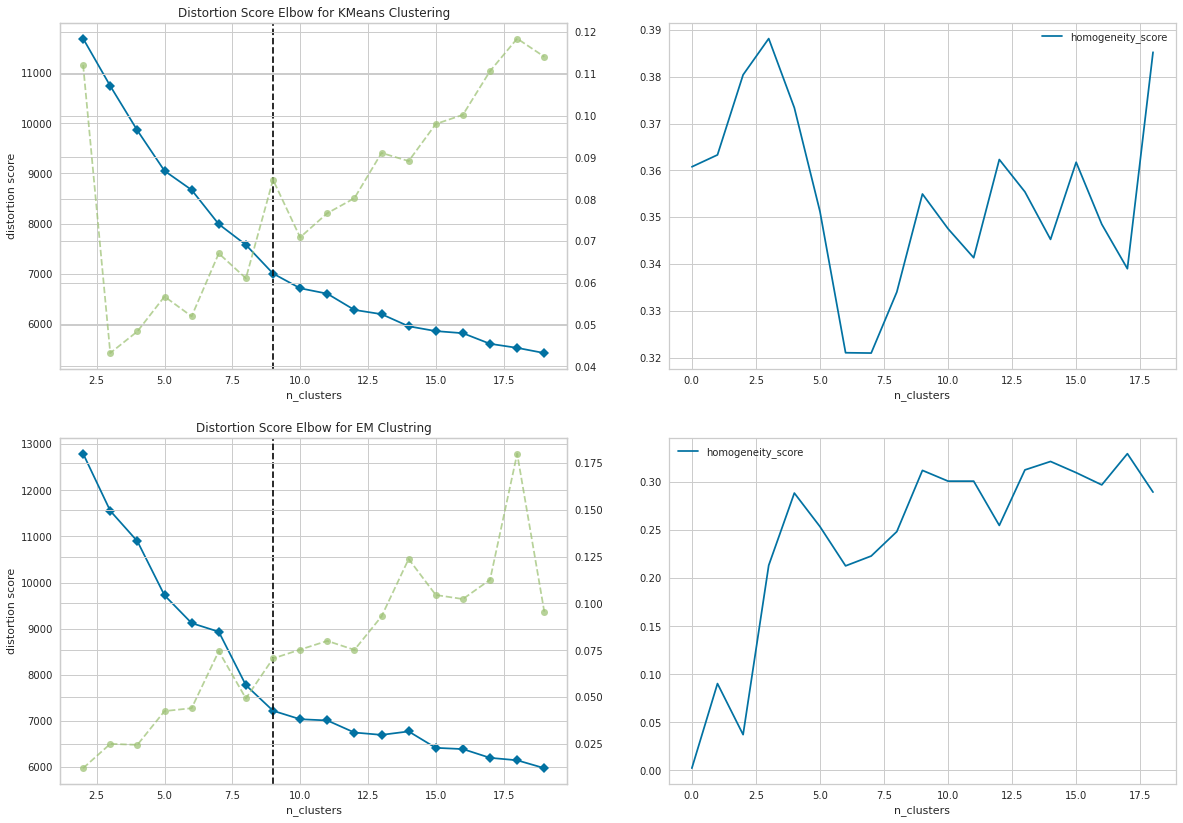

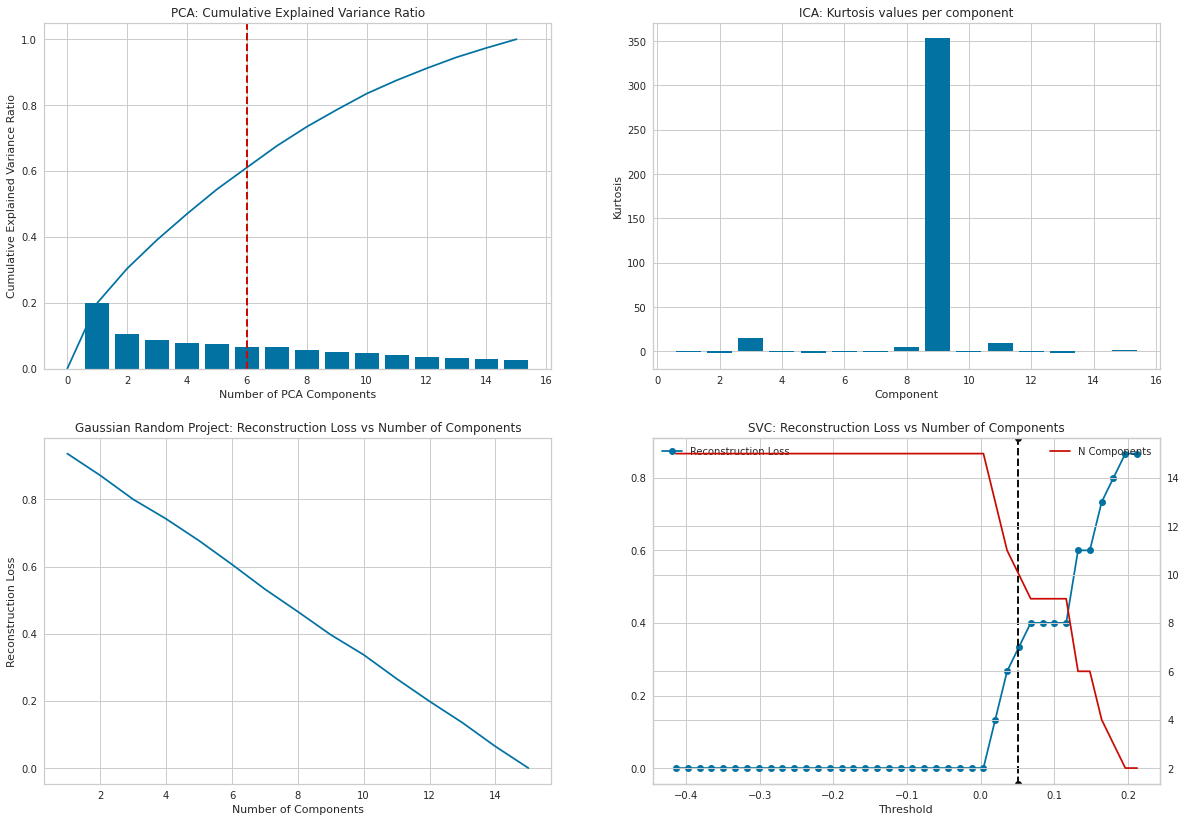

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


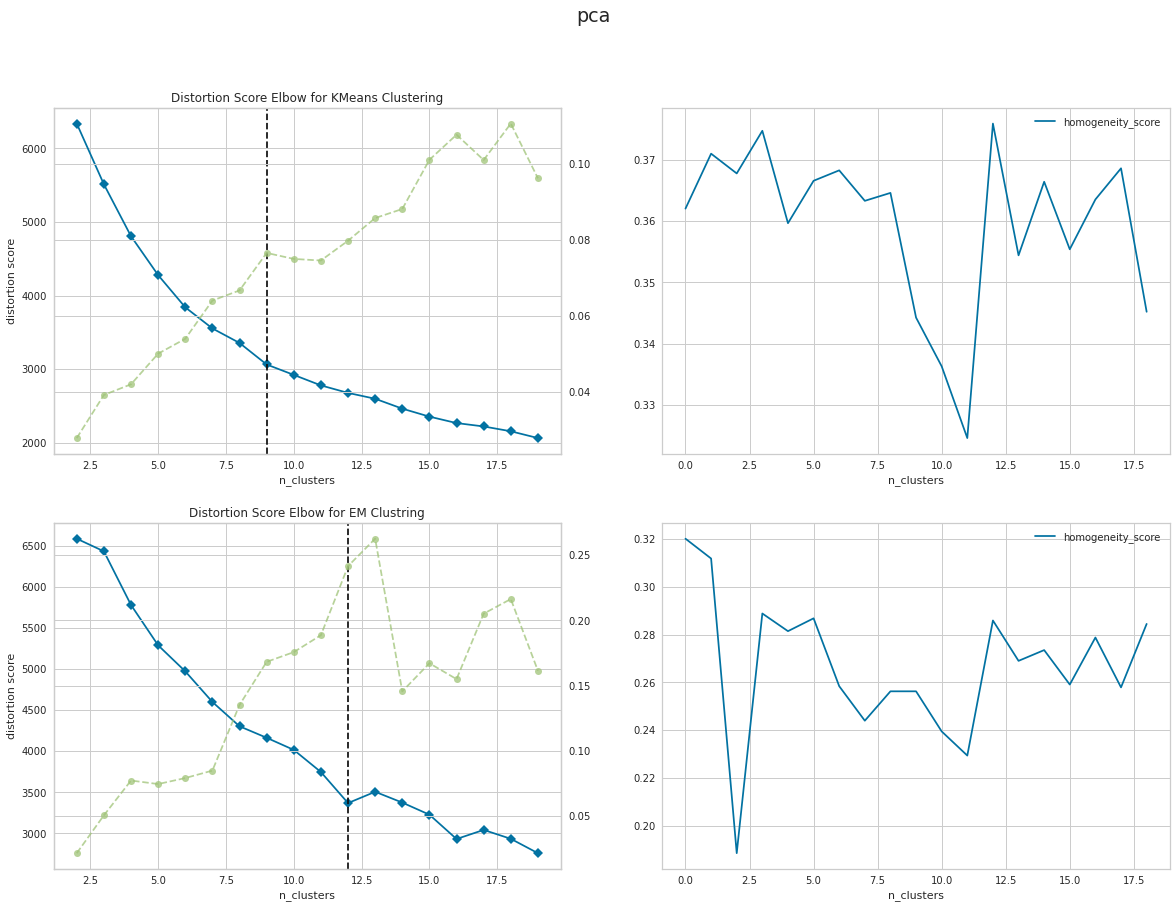

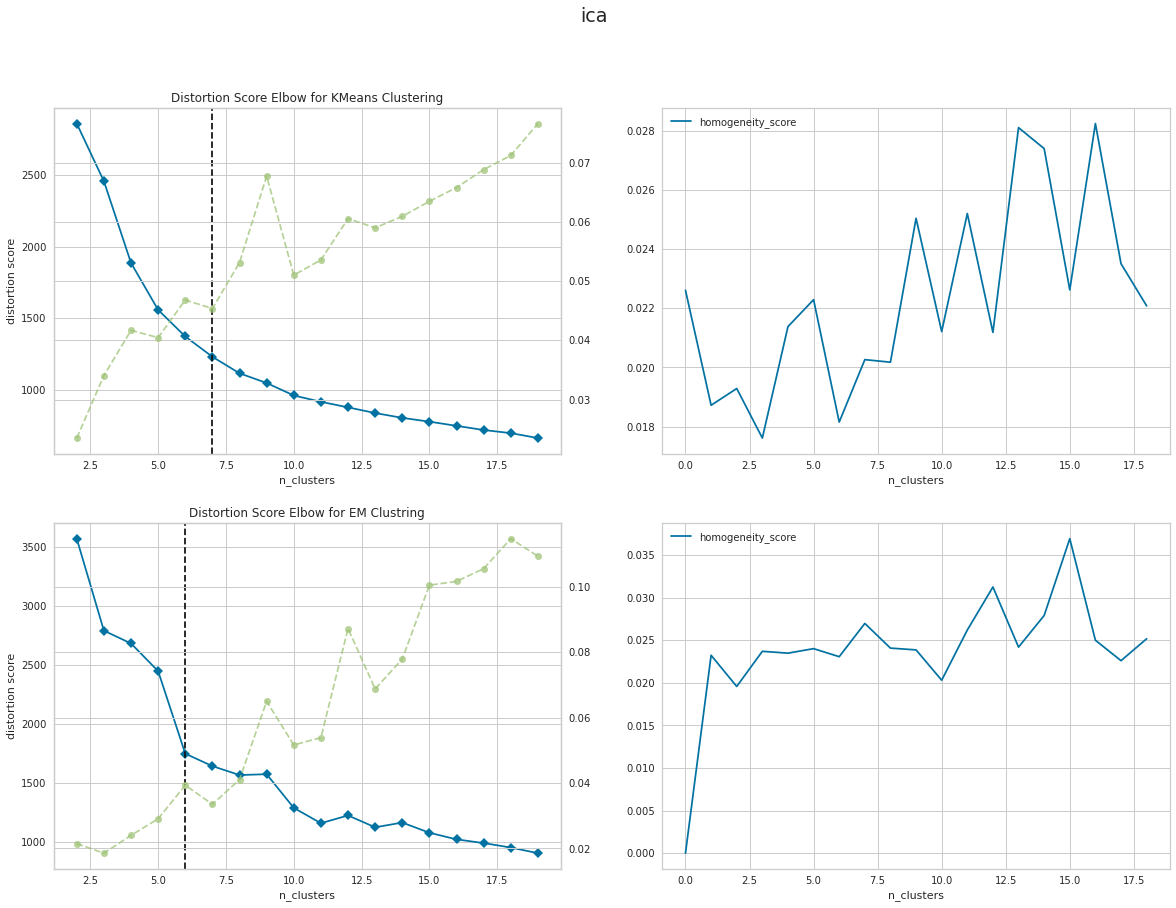

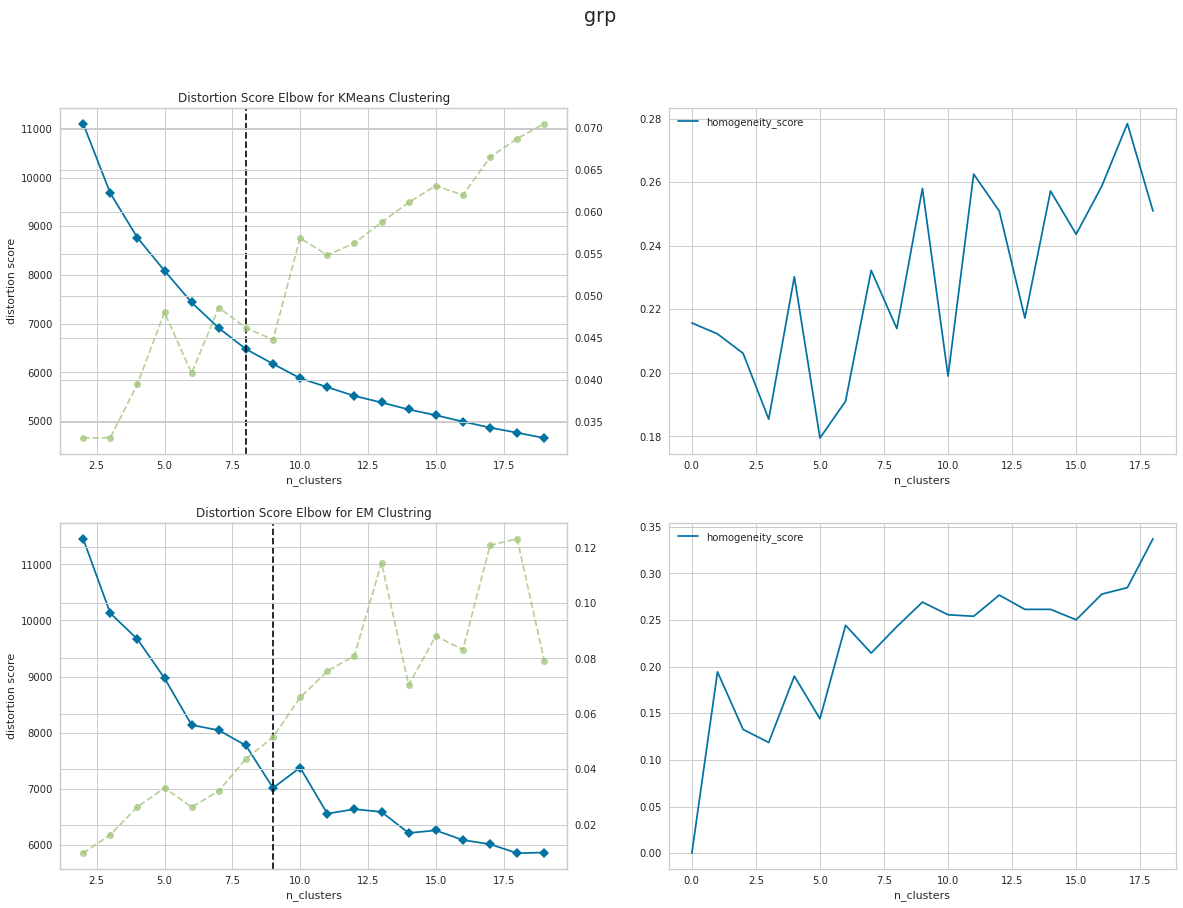

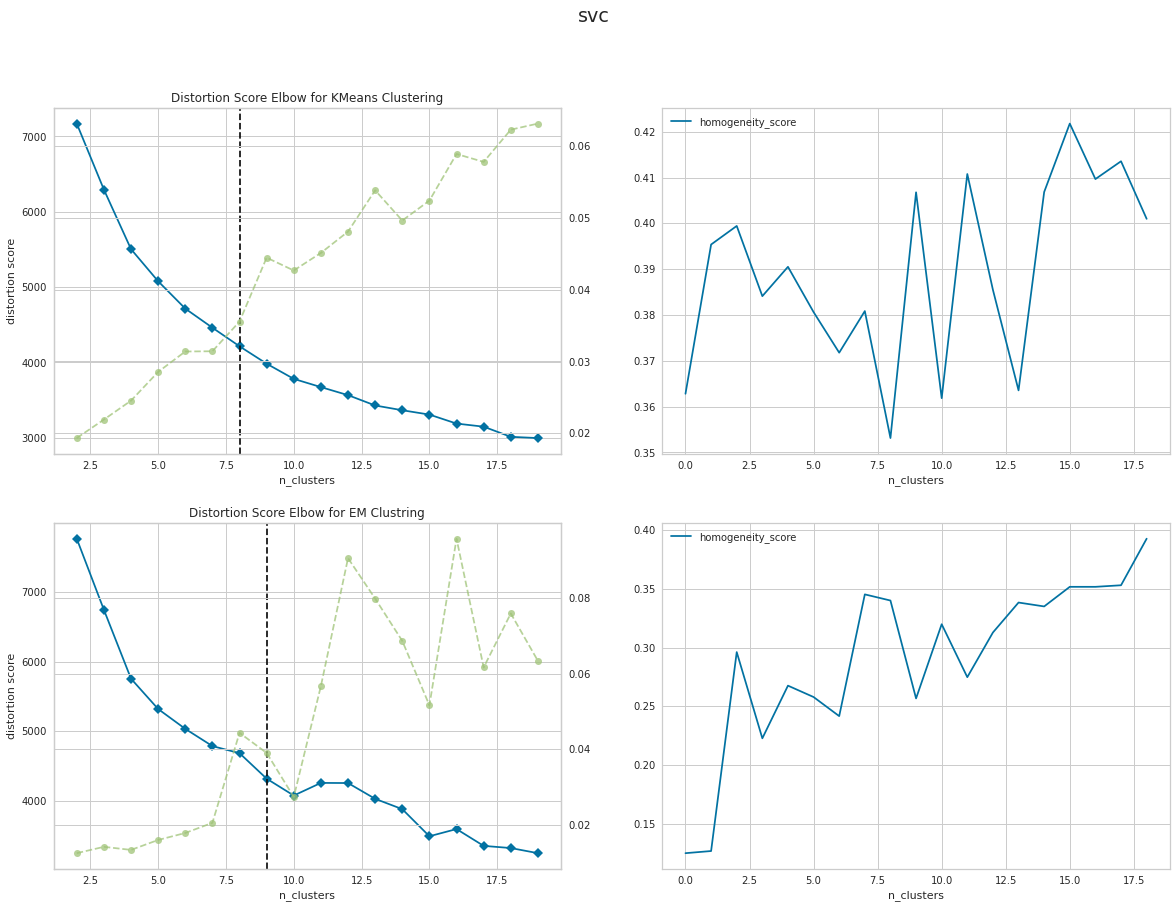

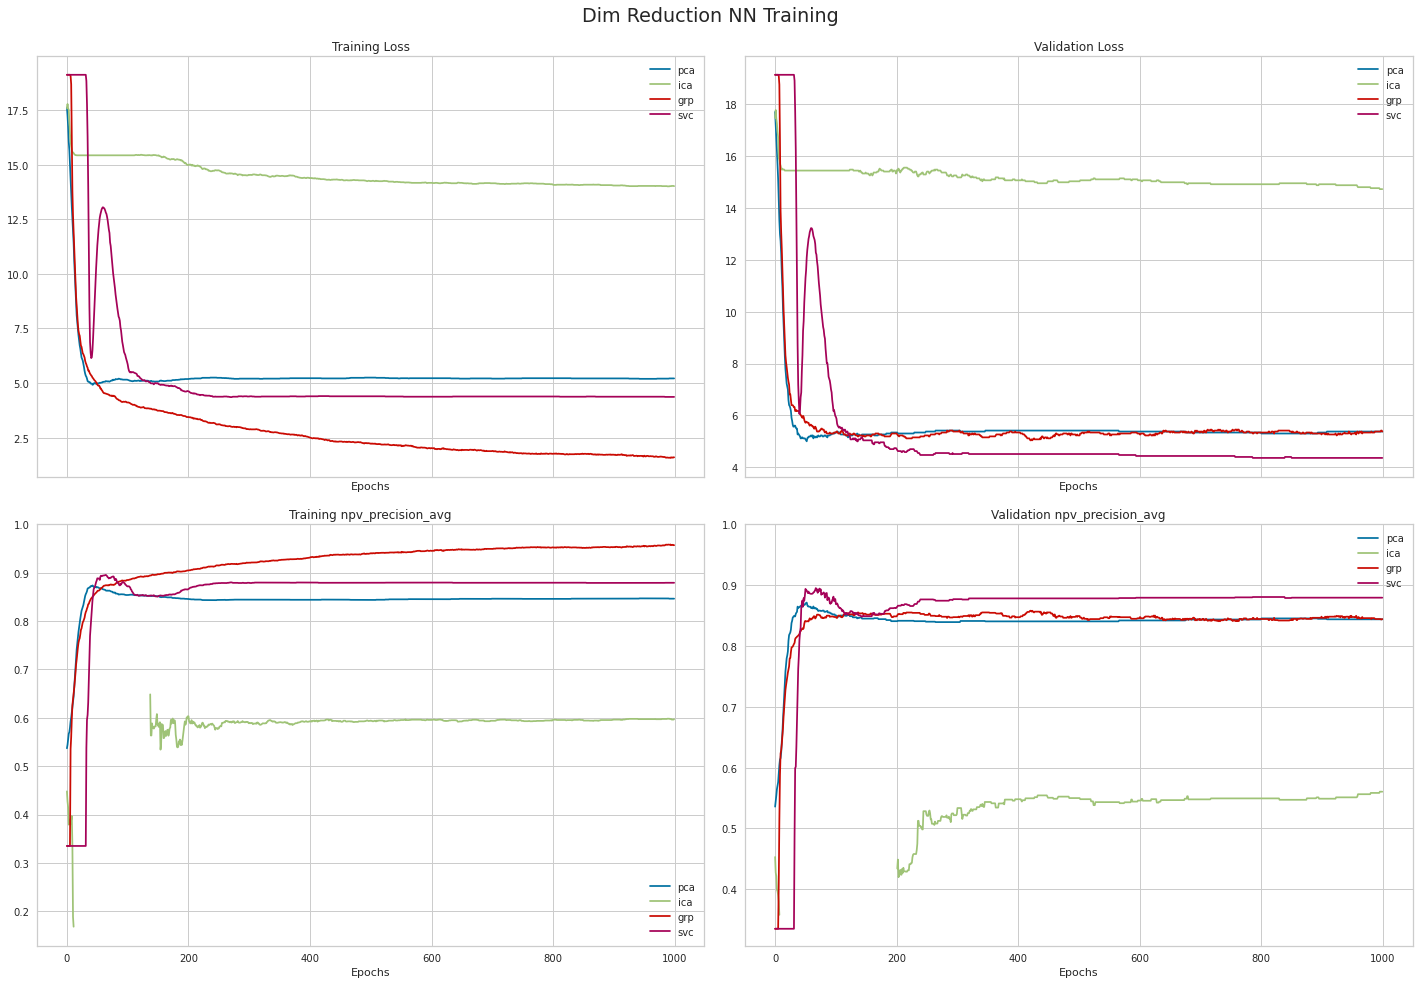

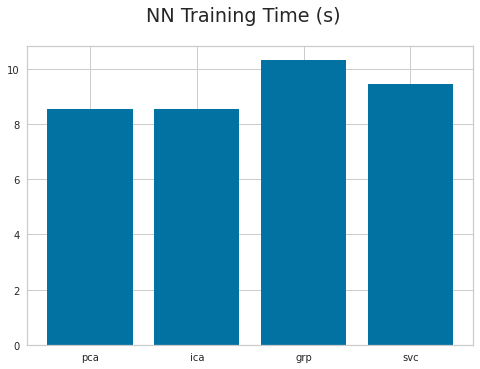

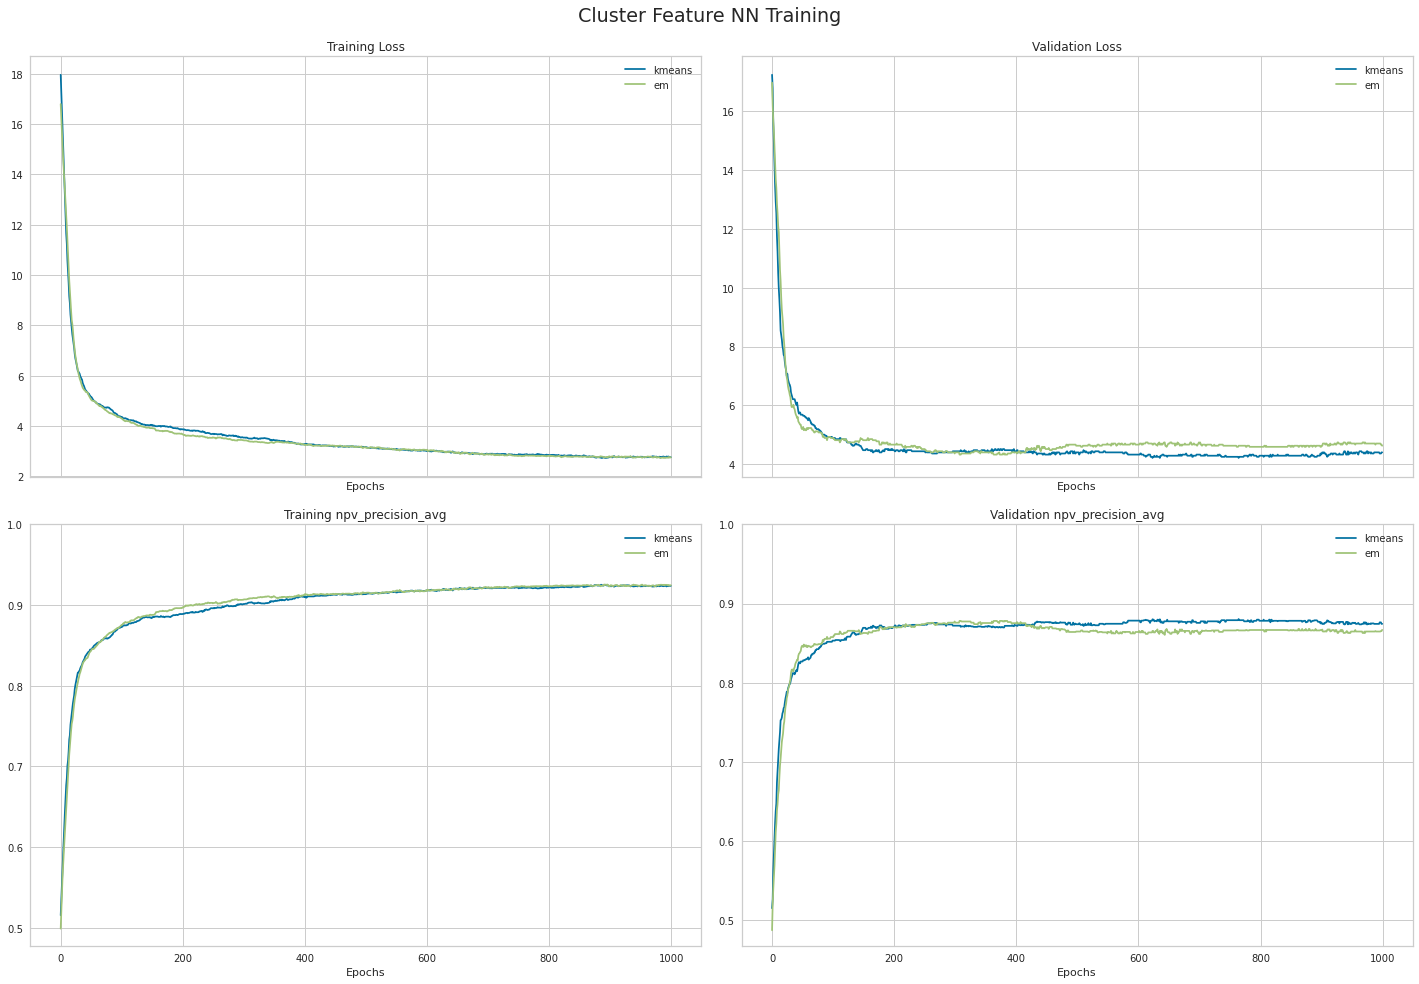

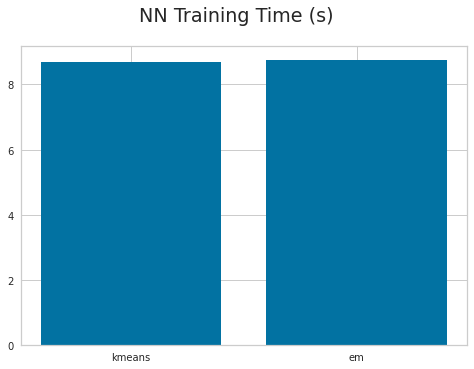

In [10]:
experiment.run()